# Prosper Loan Data
## by Mohammed Gameel Rashad

## Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
I only focused on the most important features which are:
- **Term:**The length of the loan expressed in months.
- **LoanStatus:**The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- **ClosedDate:**Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses. 
- **BorrowerAPR:**The Borrower's Annual Percentage Rate (APR) for the loan.
- **LenderYield:**The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
- **ProsperScore:**A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
- **ListingCategory:**The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
- **BorrowerState:**The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
- **Occupation:**The Occupation selected by the Borrower at the time they created the listing.
- **EmploymentStatus:**The employment status of the borrower at the time they posted the listing.
- **EmploymentStatusDuration:**The length in months of the employment status at the time the listing was created.
- **IsBorrowerHomeowner:**A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- **IncomeRange:**The income range of the borrower at the time the listing was created.
- **IncomeVerifiable:**The borrower indicated they have the required documentation to support their income.
- **StatedMonthlyIncome:**The monthly income the borrower stated at the time the listing was created.
- **TotalProsperLoans:**Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans. 
- **TotalProsperPaymentsBilled:**Number of on time payments the borrower made on Prosper loans at the time they created this listing. This value will be null if the borrower had no prior loans.
- **OnTimeProsperPayments:**Number of on time payments the borrower had made on Prosper loans at the time they created this listing. This value will be null if the borrower has no prior loans.
- **LoanOriginalAmount:**The origination amount of the loan.
- **LoanOriginationDate:**The date the loan was originated.
- **MonthlyLoanPayment:**The scheduled monthly loan payment.
- **PercentFunded:**Percent the listing was funded.
- **Recommendations:**Number of recommendations the borrower had at the time the listing was created.
- **InvestmentFromFriendsCount:**Number of friends that made an investment in the loan.
- **InvestmentFromFriendsAmount:**Dollar amount of investments that were made by friends.
- **Investors:**The number of investors that funded the loan.

In [47]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [48]:
#loading data set  and filtering columns
df = pd.read_csv('prosperLoanData.csv')
df= df[['Investors','InvestmentFromFriendsAmount','InvestmentFromFriendsCount','Recommendations','PercentFunded','MonthlyLoanPayment','LoanOriginationDate','LoanOriginalAmount','OnTimeProsperPayments','TotalProsperPaymentsBilled','TotalProsperLoans','StatedMonthlyIncome','IncomeVerifiable','IncomeRange','IsBorrowerHomeowner','EmploymentStatusDuration','EmploymentStatus','Occupation','BorrowerState',r'ListingCategory (numeric)','ProsperScore','LenderYield','BorrowerAPR','ClosedDate','LoanStatus','Term']]

In [49]:
df.head()

,Investors,InvestmentFromFriendsAmount,InvestmentFromFriendsCount,Recommendations,PercentFunded,MonthlyLoanPayment,LoanOriginationDate,LoanOriginalAmount,OnTimeProsperPayments,TotalProsperPaymentsBilled,...,EmploymentStatus,Occupation,BorrowerState,ListingCategory (numeric),ProsperScore,LenderYield,BorrowerAPR,ClosedDate,LoanStatus,Term
0,258,0.0,0,0,1.0,330.43,2007-09-12 00:00:00,9425,NaN,NaN,...,Self-employed,Other,CO,0,NaN,0.1380,0.16516,2009-08-14 00:00:00,Completed,36
1,1,0.0,0,0,1.0,318.93,2014-03-03 00:00:00,10000,NaN,NaN,...,Employed,Professional,CO,2,7.0,0.0820,0.12016,NaN,Current,36
2,41,0.0,0,0,1.0,123.32,2007-01-17 00:00:00,3001,NaN,NaN,...,Not available,Other,GA,0,NaN,0.2400,0.28269,2009-12-17 00:00:00,Completed,36
3,158,0.0,0,0,1.0,321.45,2012-11-01 00:00:00,10000,NaN,NaN,...,Employed,Skilled Labor,GA,16,9.0,0.0874,0.12528,NaN,Current,36
4,20,0.0,0,0,1.0,563.97,2013-09-20 00:00:00,15000,11.0,11.0,...,Employed,Executive,MN,2,4.0,0.1985,0.24614,NaN,Current,36


In [50]:
df.shape

(113937, 26)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Investors                    113937 non-null  int64  
 1   InvestmentFromFriendsAmount  113937 non-null  float64
 2   InvestmentFromFriendsCount   113937 non-null  int64  
 3   Recommendations              113937 non-null  int64  
 4   PercentFunded                113937 non-null  float64
 5   MonthlyLoanPayment           113937 non-null  float64
 6   LoanOriginationDate          113937 non-null  object 
 7   LoanOriginalAmount           113937 non-null  int64  
 8   OnTimeProsperPayments        22085 non-null   float64
 9   TotalProsperPaymentsBilled   22085 non-null   float64
 10  TotalProsperLoans            22085 non-null   float64
 11  StatedMonthlyIncome          113937 non-null  float64
 12  IncomeVerifiable             113937 non-null  bool   
 13 

# Data wrangling

In [52]:
#correct some data types
df.ClosedDate = df.ClosedDate.astype('datetime64')
df.LoanOriginationDate= df.LoanOriginationDate.astype('datetime64')

In [53]:
# remove some outliers
# the documentation states that prosper score has a value from 1 to 10. there are some values of 11
#these are considered outliers and must be removed

df.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [54]:
#removing 
df = df[df.ProsperScore != 11]

### What is the structure of your dataset?

Data consists of 113,912 rows. There are some missing values in some columns but they are reasonable. For example, column 8-9-10 will be null if this is the first loan for the borrower. Column 15-16-17-18 have missing information. Column 20 has value for loans after July 2009.column 23 is associated only with closed loans. I won't remove any null values because the main features don't have null values and the data is large and missing values will not affect our analysis.Proper adjustment will be done on the fly before plotting

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are:
- LoanStatus : what are the characteristics  of chargedoff , defaulted  and completed loans?
- LoanOriginalAmount : which state/occupation/category which has the most loans?
- all other features are helper features that affect these main two

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

this will be reached by exploration but my initial intuition are:
- IncomeRange                             
- Occupation  
- ProsperScore                 

## Univariate Exploration


### Term:

In [55]:
df.Term.value_counts()

36    86729
60    24138
12     1614
Name: Term, dtype: int64

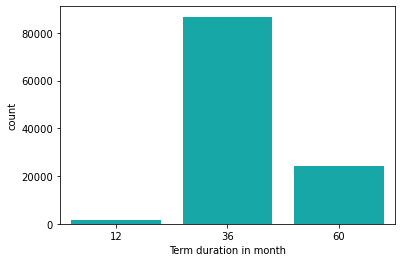

In [56]:
sns.countplot(df.Term,color = 'c');
plt.xlabel("Term duration in month");

>it looks like Prosper only allows discrete Term periods of 12,36,60 months. With most loans in 36 month duration then 60 months and small number of loans in 12 month

### LoanStatus                   

In [57]:
#percent of each status in data
df.LoanStatus.value_counts()*100/len(df.LoanStatus)

Current                   49.036726
Completed                 33.821712
Chargedoff                10.661356
Defaulted                  4.460309
Past Due (1-15 days)       0.715676
Past Due (31-60 days)      0.322721
Past Due (61-90 days)      0.277380
Past Due (91-120 days)     0.270268
Past Due (16-30 days)      0.235595
FinalPaymentInProgress     0.179586
Past Due (>120 days)       0.014225
Cancelled                  0.004445
Name: LoanStatus, dtype: float64

Text(0, 0.5, 'percent of data')

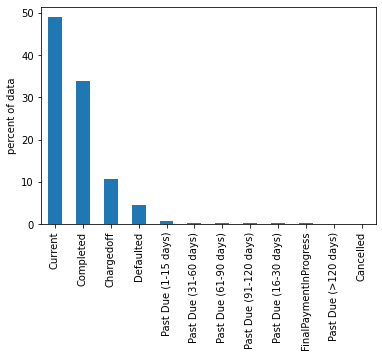

In [58]:
#percent plot of status
(df.LoanStatus.value_counts()*100/len(df.LoanStatus)).plot(kind = 'bar');
plt.ylabel("percent of data")

>Nearly half of the data is for current loans.33% of data are completed loans.10 % charged off .4% defaulted

### ClosedDate   and  LoanOriginationDate                          

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


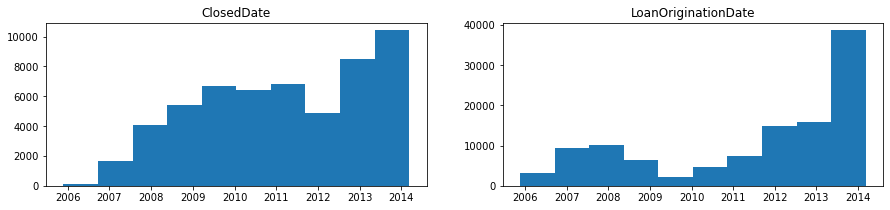

In [59]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.hist(df['ClosedDate']);
plt.title('ClosedDate');
plt.subplot(1,2,2)
plt.hist(df.LoanOriginationDate);
plt.title('LoanOriginationDate');

>the site is getting popular by time.The number of closed loans increase every year. I notice high relative number of loan origination date in years 2007-2008 compared to its neighbors. this is may be due to <a href="https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008">the global financial crisis of 2007–2008</a>

### BorrowerAPR

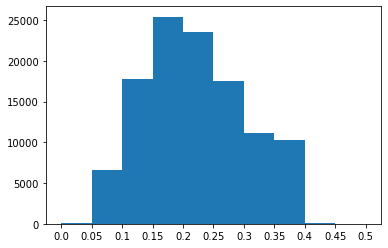

In [60]:
plt.hist(df.BorrowerAPR,bins = np.arange(0,0.55,0.05));
plt.xticks(np.arange(0,0.55,0.05),np.round(np.arange(0,0.55,0.05),2));

>the distribution is slightly right skewed. With its mode in values between 0.15-0.20 percent. Range 0.2-0.25 also have high count

### LenderYield

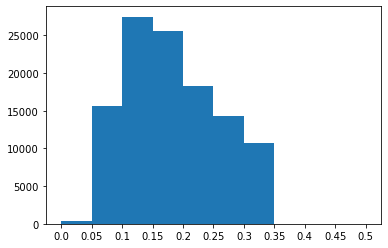

In [61]:
plt.hist(df.LenderYield,bins = np.arange(0,0.55,0.05));
plt.xticks(np.arange(0,0.55,0.05),np.round(np.arange(0,0.55,0.05),2));

>the lender yield is shifted a bin to the right compared to Borrower APR due to the servicing fee

### ProsperScore

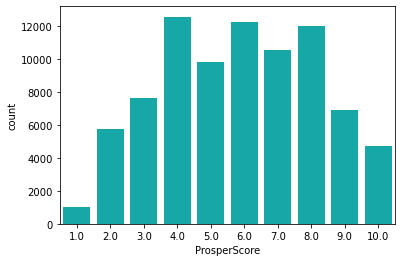

In [62]:
sns.countplot(df.ProsperScore,color='c')

> The distribution has nearly three modes 4,6 and 8

### ListingCategory

In [63]:
#mapper that connect number with its category
cat_mapper ={ 0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7: 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

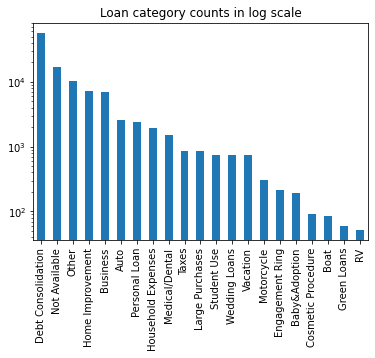

In [64]:
cat_count = df['ListingCategory (numeric)'].value_counts()
cat_count.index = pd.Series(cat_count.index).replace(cat_mapper)
cat_count.plot(kind ='bar')
plt.yscale('log')
plt.title('Loan category counts in log scale');

>the main loan reason is debt consolidation which is a form of debt refinancing that entails taking out one loan to pay off many others. Loans lead to more loans. The next high categories are home improvement and business.

> It looks like Prosper did the same analysis as we did.the top most categories(debt consolidation - home improvement )appear in the same order in the loan type list on their site https://www.prosper.com/plp/loans/loan-types/

### BorrowerState

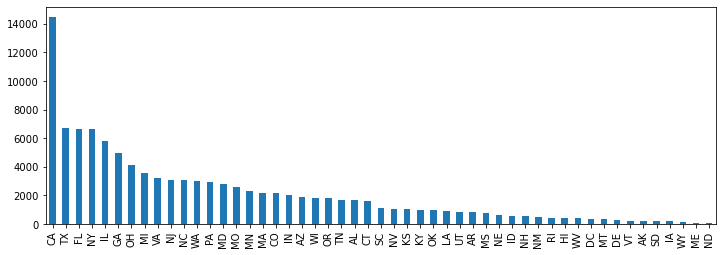

In [65]:
plt.figure(figsize=(12,4))
df.BorrowerState.value_counts().plot(kind ='bar')


>most of the loans come from California may be because prosper headquarters is there

### Occupation

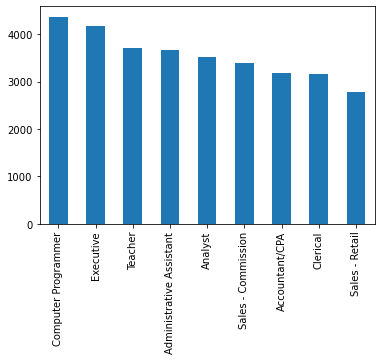

In [66]:
# the data contain many occupation we will choose top 10 occupations
#the occupation with highest count is 'other' and 'professional' so I skipped them
df.Occupation.value_counts()[2:11].plot(kind="bar")

>the most common occupation is computer programmer followed by executive and teacher

### EmploymentStatus

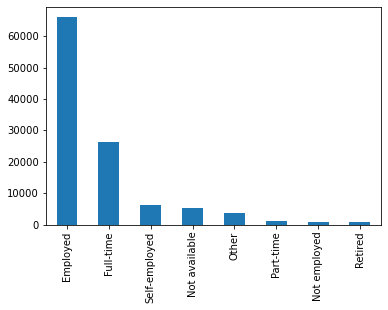

In [67]:
df.EmploymentStatus.value_counts().plot(kind ='bar')


>Most of the borrowers are employed .I think employed and full time are the same thing

### IsBorrowerHomeowner

In [68]:
df.IsBorrowerHomeowner.value_counts()

True     56505
False    55976
Name: IsBorrowerHomeowner, dtype: int64

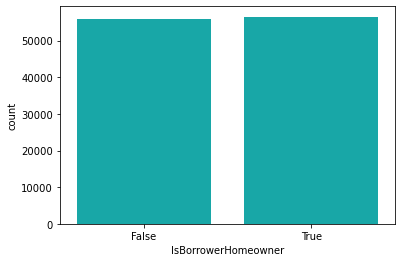

In [69]:
sns.countplot(df.IsBorrowerHomeowner,color ='c')

>there almost a 50-50 percent between home owners and borrowers who don't own a home

### IncomeRange

In [70]:
df.IncomeRange.value_counts()

$25,000-49,999    32064
$50,000-74,999    30684
$100,000+         16697
$75,000-99,999    16601
Not displayed      7741
$1-24,999          7267
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

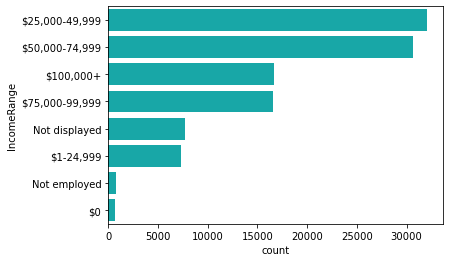

In [71]:
sns.countplot(y= df.IncomeRange,color = 'c',order =df.IncomeRange.value_counts().index )

>the most common income range is 25,000-49,999 then  50,000-74,999

### StatedMonthlyIncome

In [72]:
df.StatedMonthlyIncome.describe()

count    1.124810e+05
mean     5.566065e+03
std      7.492644e+03
min      0.000000e+00
25%      3.166667e+03
50%      4.598750e+03
75%      6.711083e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

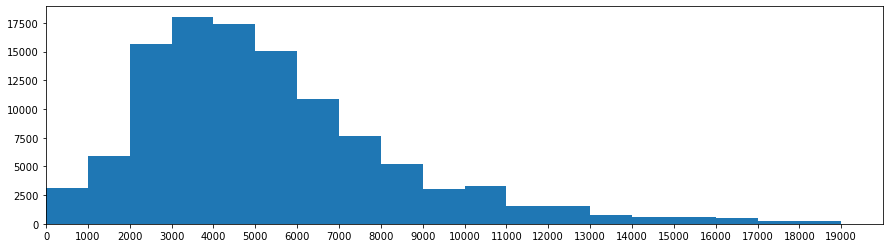

In [73]:
# the distribution has along tail so I will trim it to see accurate mode
plt.figure(figsize=(15,4))
plt.hist(df.StatedMonthlyIncome,bins =np.arange(0,20000,1000))
plt.xlim(0,20000)
plt.xticks(np.arange(0,20000,1000),np.arange(0,20000,1000));

> the distribution is very right skewed but has modes between 3000 and 5000

### LoanOriginalAmount

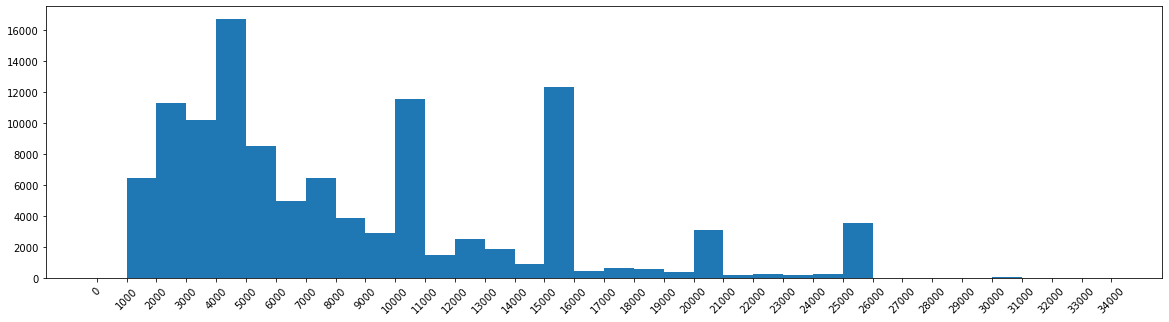

In [74]:
bins = np.arange(0,35000,1000)
plt.figure(figsize = (20,5));
plt.hist(df.LoanOriginalAmount,bins= bins);
plt.xticks(bins,bins);
plt.xticks(rotation=45);

>The distribution is right skewed with most of the loans below 5000 .There also spikes at each 5000 interval (10,000-15,000-20,000-25,000)

### Monthly loan payment

In [75]:
df[df.MonthlyLoanPayment != 0]['MonthlyLoanPayment'].describe()

count    111546.000000
mean        272.781406
std         190.416881
min           0.150000
25%         133.600000
50%         218.195000
75%         370.110000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

Text(0.5, 0, 'monthly loan payment {log scale}')

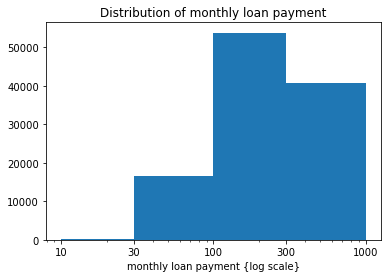

In [76]:
bins = [10,30,100,300,1000]
#remove zero loan payment
plt.hist(df[df.MonthlyLoanPayment != 0]['MonthlyLoanPayment'],bins)
plt.xscale('log')
plt.xticks([10,30,100,300,1000],[10,30,100,300,1000]);
plt.title('Distribution of monthly loan payment')
plt.xlabel('monthly loan payment {log scale}')

>most of the loans require 100-300 payment monthly. There is also high count of loans that require 300-1000 monthly

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - loan status: most of the loans are still open. I will focus on the characteristics of completed ,defaulted and charged off loans
- loan amount : most of the loans below 5000 but there are interesting spikes at 10000,15000,20000,25000 that need more exploration
-some of the plots needed log transformations

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> - some data types were corrected
- some outliers were removed

>there was no un unusual distribution. Correcting data types help in exploring the data and removing un reasonable points help in investigating the true properties of the data away from wrong observations

## Bivariate Exploration


Let's explore the following relations:
- relation between loan amount and its status
- relation between Borrower ARP and loan status
- relation between income range and loan status
- relation between prosper score and loan status
- the amount of loan in each category
- the amount of laon in each state
- relation between income range and loan amount
- relation between loan amount and borrowerAPR

### relation between loan amount and its status

In [77]:
#I will focus on the completed, defaulted and charged off loans
df.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [78]:
# filter main df
loan_status_data = df[df.LoanStatus.isin(['Defaulted','Chargedoff','Completed'])]
# turn income range into ordered categorical datatype
income_order = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999',
         '$75,000-99,999','$100,000+']
income_order_cat = pd.api.types.CategoricalDtype(ordered=True,categories = income_order )
loan_status_data['IncomeRange'] = loan_status_data['IncomeRange'].astype(income_order_cat)

<ipython-input-78-d52d2ee0e71d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_status_data['IncomeRange'] = loan_status_data['IncomeRange'].astype(income_order_cat)


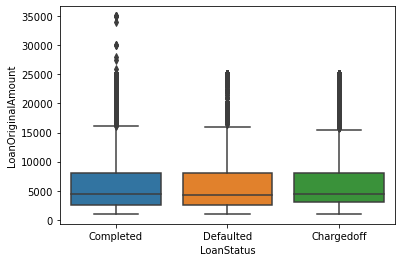

In [79]:
sns.boxplot(data=loan_status_data , x='LoanStatus' , y='LoanOriginalAmount')

>looks like the three types have median at the global median of 5000 and there is no effect of the amount of the loan on its status

### relation between Borrower ARP and loan status

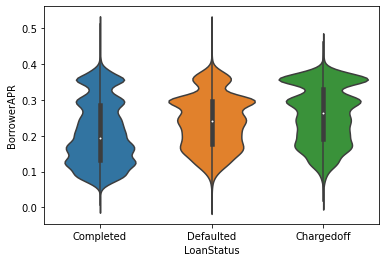

In [80]:
sns.violinplot(data=loan_status_data , x='LoanStatus' ,y= 'BorrowerAPR' )

>the median of the borrower arp is higher in defaulted loans than completed and is the highest in chargedoff loans.Chargedoff loans has also a large peak at around 0.35

### relation between income range and loan status

In [81]:
#calculate the percent for each income range in a status
count =loan_status_data.groupby(['LoanStatus','IncomeRange']).size()
total = loan_status_data.groupby(['LoanStatus']).count()['Investors']
percent = count/total
pivoted = percent.reset_index().pivot('LoanStatus','IncomeRange',0)
pivoted = pivoted[['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999',
         '$75,000-99,999','$100,000+']]
pivoted

IncomeRange,Not displayed,Not employed,$0,"$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"
LoanStatus,,,,,,,,
Chargedoff,0.115077,0.015177,0.015427,0.110824,0.347065,0.219563,0.096147,0.080720
Completed,0.121179,0.008543,0.009726,0.076440,0.286097,0.243961,0.128907,0.125148
Defaulted,0.348216,0.004983,0.010165,0.066574,0.257126,0.174208,0.074547,0.064182


Text(0.5, 1.0, 'percent of each income range in loan status')

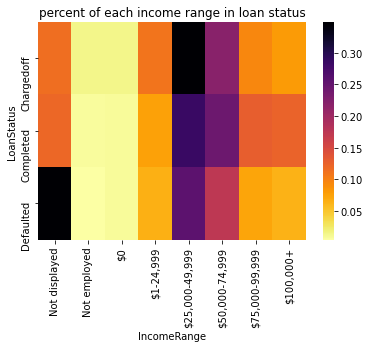

In [82]:
sns.heatmap(pivoted,cmap='inferno_r')
plt.title('percent of each income range in loan status')

>- the highest percent of charged off loans are in range of 25k-50k income. The same applies for completed loans.
>- I think this relation needs more investigation adding a third variable like borrower ARP


### relation between prosper score and loan status

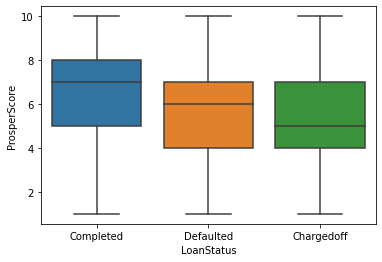

In [83]:
sns.boxplot(data=loan_status_data,x='LoanStatus' , y='ProsperScore');

>the completed loan has the highest prosper score followed by the defaulted then chargedoff

### the amount of loan in each category

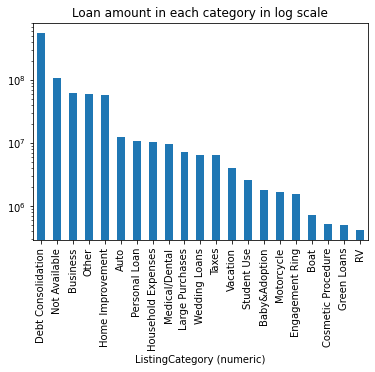

In [84]:
cat_amount = df.groupby('ListingCategory (numeric)').sum()['LoanOriginalAmount']
cat_amount.index = pd.Series(cat_amount.index).replace(cat_mapper)
cat_amount = cat_amount.sort_values(ascending = False)
cat_amount.plot(kind="bar")
plt.yscale('log')
plt.title('Loan amount in each category in log scale');

>we notice here that the largest amount of debts is in debt consolidation. Business and home improvement have high amount of loans too.

### the amount of laon in each state

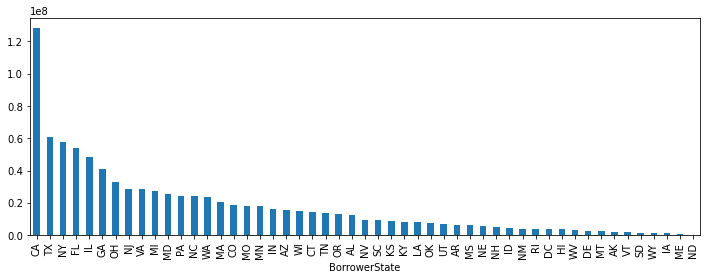

In [85]:
state_amount = df.groupby('BorrowerState').sum()['LoanOriginalAmount']
state_amount = state_amount.sort_values(ascending = False)
plt.figure(figsize=(12,4))
state_amount.plot(kind="bar")

>like the count distribution the amount distribution shows California on top followed by Texas and New York

### relation between income range and loan amount

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

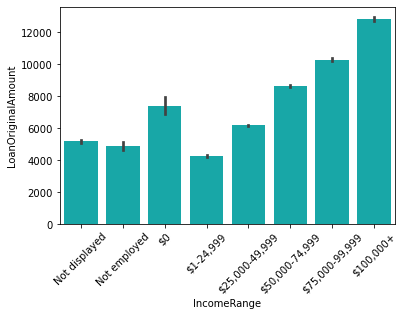

In [86]:
sns.barplot(data = df , x="IncomeRange" , y="LoanOriginalAmount",color = "c",
           order = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999',
         '$75,000-99,999','$100,000+'])
plt.xticks(rotation=45)

> As expected high loans are associated with high income range

  ### relation between loan amount and borrowerAPR
  <a id='regplot'></a>

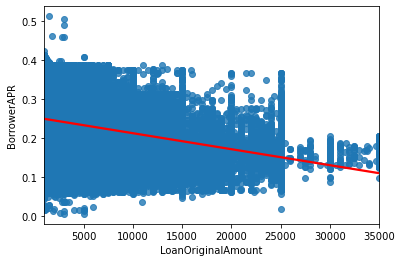

In [87]:
sns.regplot(df.LoanOriginalAmount,df.BorrowerAPR,line_kws={'color':'r'})

> the Borrower ARP has large variation but it tends to be lower for high loan amount

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> -	The distribution of loan amount with states and categories followed the same distribution of loan counts.
-	Some parts need more investigation such as relation between income range and loan status
And effect of loan amount on its status

>There are some clear relationships:
- the loan tends to be completed when it has high Prosper score or low ARP
- the more income range the more loan amount


## Multivariate Exploration


### let's explore the following relations
- the effect of (percent of  monthly income paid as loan payment) on loan status
- the effect of apr  on the realtion between loan status and  monthly income 
- relation ship between prosper score , loan status , lender yield

### the effect of (percent of  monthly income paid as loan payment) on loan status

In [88]:
#make copy
new_df = loan_status_data.copy()

# clean the data
new_df = new_df[(new_df.MonthlyLoanPayment !=0) & (new_df.StatedMonthlyIncome != 0)]
new_df['per_of_income']  =new_df.MonthlyLoanPayment*100/new_df.StatedMonthlyIncome

#its reasonable that the loan payment must be within the monthly income. That is the percent of
#loan payment to monthly income is less than or equal to 100% any value higher than 100% is 
#considered a wrong value

new_df = new_df[new_df['per_of_income']<=100]

In [89]:
new_df.groupby('LoanStatus').median()['per_of_income']

LoanStatus
Chargedoff    4.694211
Completed     3.912504
Defaulted     4.575393
Name: per_of_income, dtype: float64

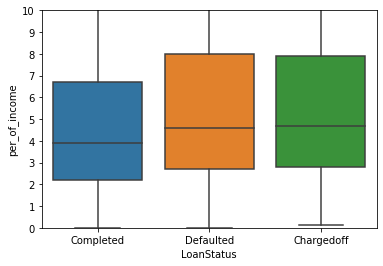

In [90]:
sns.boxplot(data=new_df,x='LoanStatus' , y='per_of_income')
# set focus away from tail
plt.ylim(0,10)
plt.yticks(np.arange(0,11,1),np.arange(0,11,1));

>completed loans tend to have low monthly loan payment to income ratio at around 4%.Defaulted and chargedoff loans has median percent of nearly 4.6%.However, the difference is not very significant so I won't use this visualization in the explanatory part

### the effect of arp on the realtion between loan status and  monthly income 

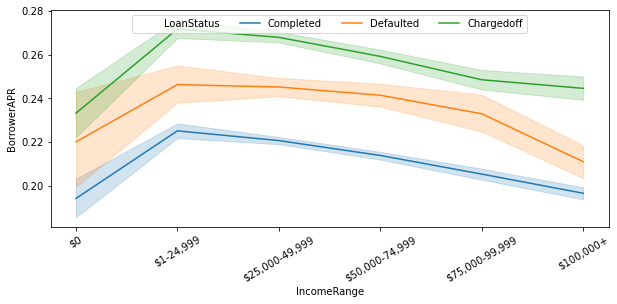

In [91]:
plt.figure(figsize=(10,4))
# filter unknown income
plot_data = loan_status_data[~loan_status_data['IncomeRange'].isin(['Not displayed','Not employed'])]
sns.lineplot(data = plot_data , x= "IncomeRange" , y= 'BorrowerAPR',hue = "LoanStatus" )
plt.xticks(rotation = 30)
plt.legend(loc = 9 , ncol=4)

>completed loans are associated with low APR for all income ranges. Defaulted loans have higher APR. Charged off loans have the highest APR. The lines points downwards due to the negative relation between APR and loan amount as discussed in the [bi variant exploration](#regplot) 

### relation ship between prosper score , loan status , lender yield

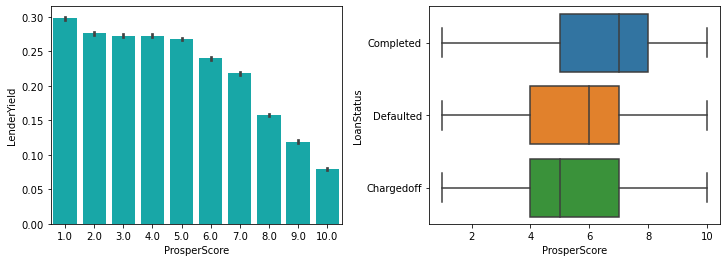

In [92]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(data = loan_status_data , x = 'ProsperScore', y= 'LenderYield',color='c'  )
plt.subplot(1,2,2)
sns.boxplot(data=loan_status_data,y='LoanStatus' , x='ProsperScore')
plt.subplots_adjust(wspace = 0.3 )

>as observed low prosper scores are associated with higher lender yield but they also have high risk to be charged off or defaulted. High prosper scores have low lender yield but it has low risk and higher chance to be completed

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>I analyzed the data in two different points of view the borrower point of view and the lender point of view.

>Borrower point of view: The analysis showed that completed loans are associated with low APR.

>Lender point of view: the analysis showed that low prosper score has high lender yield but it has high risk to be defaulted or charged off



>These new findings strengthen and clarify the relationships discovered in the bivariant section. In the bivariant section we discovered that low prosper score has high risk but after adding another variable lender yield, we discovered also that it has high lender yield.